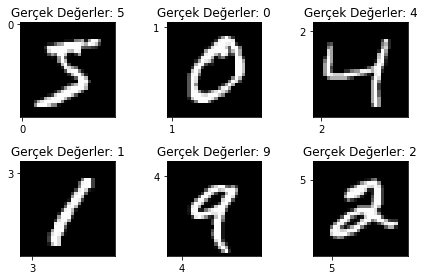

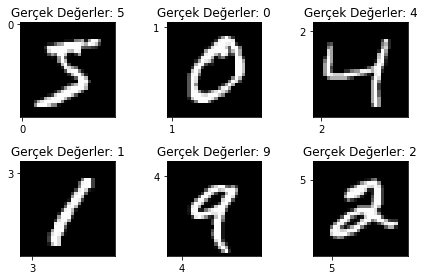

In [4]:
#MNIST datasetini kullanacağız.
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i],cmap='gray',interpolation='none')
  plt.title("Gerçek Değerler: " + str(y_train[i]))
  plt.xticks([i])
  plt.yticks([i])
fig

In [16]:
#mnist veri seti üzerindeki sınıflandırmamızıyapalım.
import torch.nn as nn
import torch
import torch.nn.functional as F
import numpy as np
from keras.datasets import mnist
#Tensorflow u encoding için kullanacağız şimdilik.
import tensorflow as tf


(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train/255
print("Dataset original targer: ",y_train[0])
y_train = tf.keras.utils.to_categorical(y_train)
print("Değiştirilmiş Hali On Hot Encode", y_train[0])

class Network(nn.Module):
  def __init__(self):
    super(Network,self).__init__()
    self.layer1 = nn.Linear(784,100)
    self.layer2 = nn.Linear(100,100)
    self.layer3 = nn.Linear(100,100)
    #Son katman sınıfımız kadar çıktı vermeli.
    self.layer4 = nn.Linear(100,10)
  def forward(self,output):
    output = output.reshape(output.size(0),-1)
    output = F.sigmoid(self.layer1(output))
    output = F.sigmoid(self.layer2(output))
    output = F.sigmoid(self.layer3(output))
    output = F.sigmoid(self.layer4(output))
    return output

network = Network()
optimizer = torch.optim.SGD(network.parameters(),lr=0.2,momentum = 0.99)
loss_func = nn.MSELoss()

epoch = 1000
for epo in range(epoch):
  for idx in range(10):
    data_x = torch.tensor([x_train[idx]])
    label_x = torch.tensor([y_train[idx]])
    optimizer.zero_grad()
    network_output = network(data_x.float())
    loss = loss_func(network_output,label_x.float())
    loss.backward()
    optimizer.step()
print(network(torch.tensor([x_test[0]]).float()))






Dataset original targer:  5
Değiştirilmiş Hali On Hot Encode [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


tensor([[1.5204e-25, 7.9547e-09, 1.0030e-19, 1.0147e-17, 3.4124e-06, 5.5498e-23,
         1.3690e-20, 7.6069e-25, 4.2551e-18, 3.9866e-14]],
       grad_fn=<SigmoidBackward>)
